In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_palette("tab10")

In [2]:
df = pd.read_csv("expenses.csv")
df.drop_duplicates(inplace=True)

In [3]:
df.isna().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [4]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,1337.0,39.222139,14.044333,18.0000,27.000,39.0000,51.00000,64.00000
bmi,1337.0,30.663452,6.100468,15.9600,26.290,30.4000,34.70000,53.13000
children,1337.0,1.095737,1.205571,0.0000,0.000,1.0000,2.00000,5.00000
charges,1337.0,13279.121487,12110.359656,1121.8739,4746.344,9386.1613,16657.71745,63770.42801


In [5]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


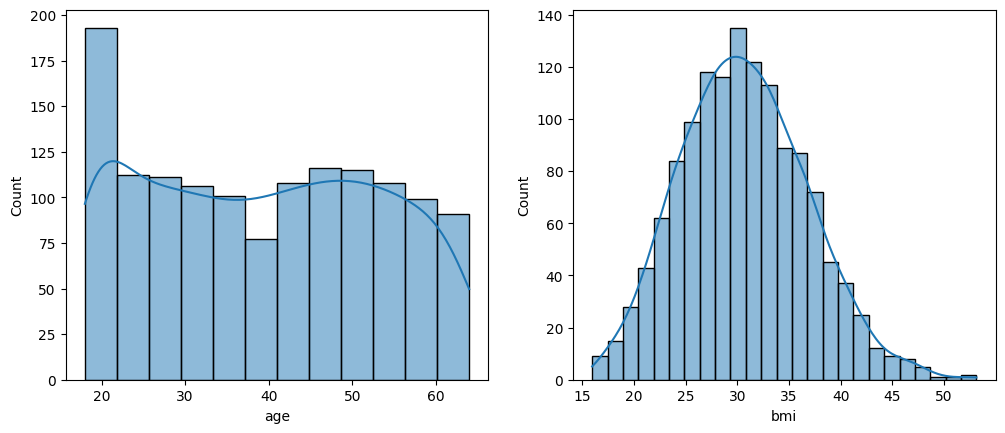

In [6]:
fig, (ax1) = plt.subplots(nrows=1,ncols=2)
fig.set(figwidth=12)
sns.histplot(x='age', data=df, ax=ax1[0],kde=True)
sns.histplot(x='bmi', data=df, ax=ax1[1],kde=True)

plt.show()

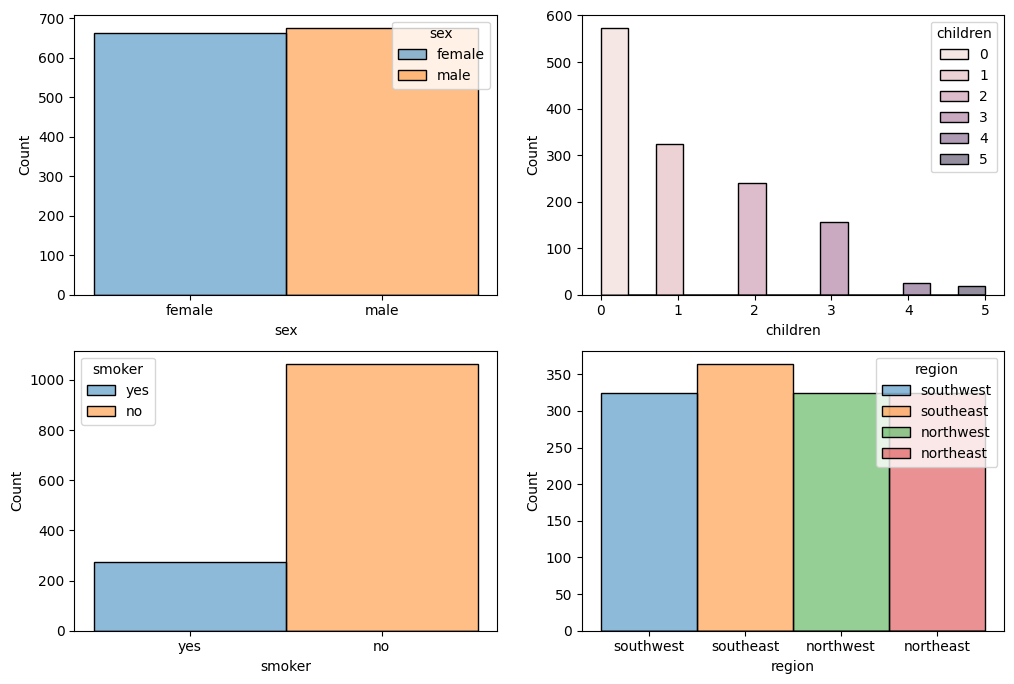

In [43]:
fig, (ax1,ax2) = plt.subplots(nrows=2,ncols=2)
fig.set(figwidth=12, figheight=8)
sns.histplot(x='sex', hue='sex', data=df, ax=ax1[0])
sns.histplot(x='children',hue='children', data=df, ax=ax1[1])
sns.histplot(x='smoker', hue='smoker', data=df, ax=ax2[0])
sns.histplot(x='region',hue='region', data=df, ax=ax2[1])
plt.show()

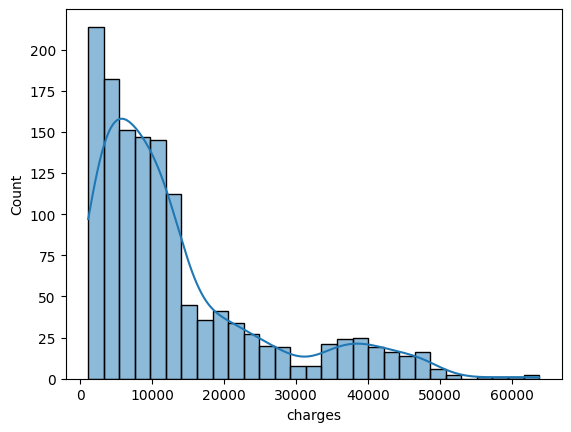

In [8]:
fig, (ax1) = plt.subplots(nrows=1,ncols=1)
sns.histplot(x='charges', data=df, ax=ax1,kde=True,log_scale=False)
plt.show()

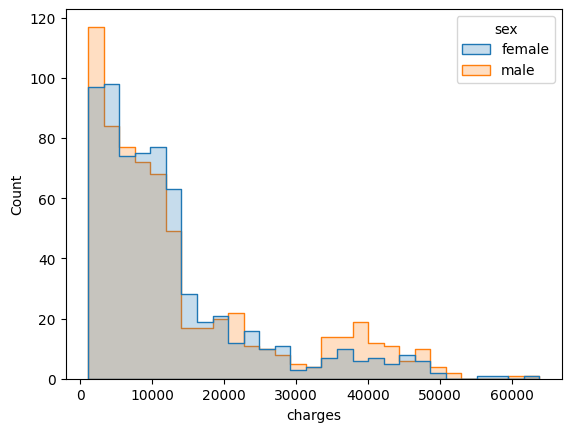

In [9]:
fig, (ax1) = plt.subplots(nrows=1,ncols=1)
sns.histplot(x='charges',hue='sex', data=df, ax=ax1,log_scale=False,element='step')
plt.show()

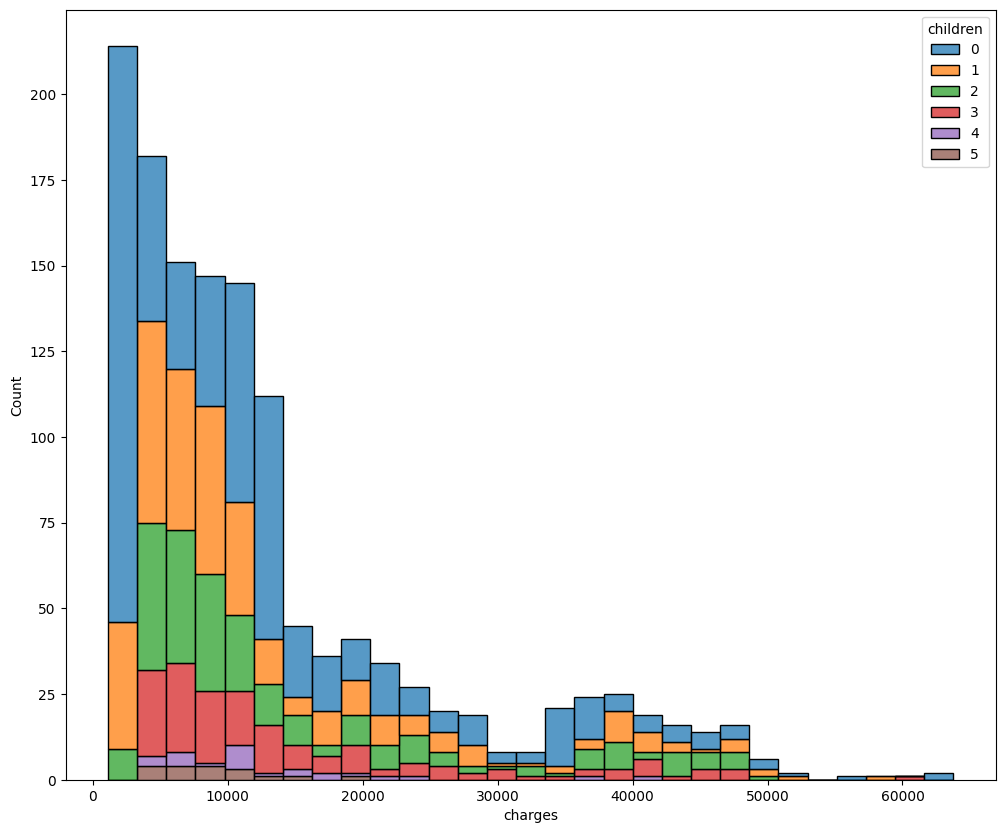

In [42]:
fig, (ax1) = plt.subplots(nrows=1,ncols=1)
fig.set(figwidth=12, figheight=10)
sns.histplot(x='charges',hue='children',palette='tab10', data=df, ax=ax1,log_scale=False,element='bars',multiple='stack')
plt.show()

In [11]:
pd.cut(df['charges'], 29).value_counts().sort_index()

charges
(1059.225, 3282.169]      214
(3282.169, 5442.464]      182
(5442.464, 7602.759]      151
(7602.759, 9763.054]      147
(9763.054, 11923.349]     145
(11923.349, 14083.644]    112
(14083.644, 16243.939]     45
(16243.939, 18404.234]     36
(18404.234, 20564.529]     41
(20564.529, 22724.824]     34
(22724.824, 24885.119]     27
(24885.119, 27045.414]     20
(27045.414, 29205.709]     19
(29205.709, 31366.003]      8
(31366.003, 33526.298]      8
(33526.298, 35686.593]     21
(35686.593, 37846.888]     24
(37846.888, 40007.183]     25
(40007.183, 42167.478]     19
(42167.478, 44327.773]     16
(44327.773, 46488.068]     14
(46488.068, 48648.363]     16
(48648.363, 50808.658]      6
(50808.658, 52968.953]      2
(52968.953, 55129.248]      0
(55129.248, 57289.543]      1
(57289.543, 59449.838]      1
(59449.838, 61610.133]      1
(61610.133, 63770.428]      2
Name: count, dtype: int64

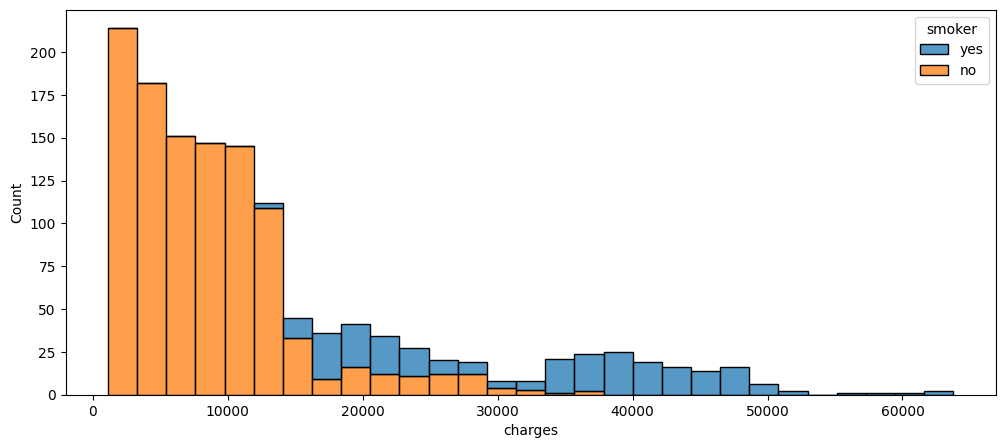

In [41]:
fig, (ax1) = plt.subplots(nrows=1,ncols=1)
fig.set(figwidth=12, figheight=5)
sns.histplot(x='charges',hue='smoker',palette='tab10', data=df, ax=ax1,log_scale=False,element='bars',multiple='stack')
plt.show()

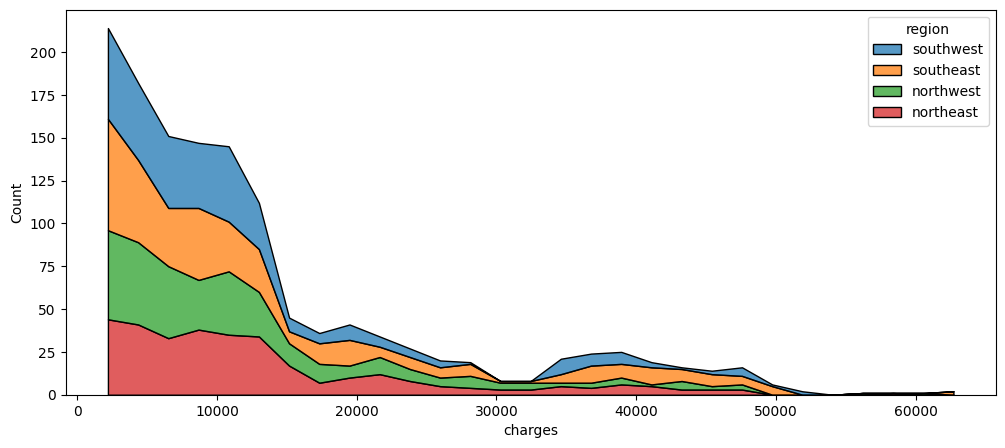

In [40]:
fig, (ax1) = plt.subplots(nrows=1,ncols=1)
fig.set(figwidth=12, figheight=5)
sns.histplot(x='charges',hue='region',palette='tab10', data=df, ax=ax1,log_scale=False,element='poly',multiple='stack')
plt.show()

In [25]:
df.sort_values(by='bmi',ascending=True).reset_index(drop=True,inplace=True)

conditions = [
    (df['bmi']<18.5),                       #underweight
    (df['bmi']>=18.5) & (df['bmi']<=25),    #normal
    (df['bmi']>25) & (df['bmi']<=29.9),     #overweight 
    (df['bmi']>29.9)]                       #obesity 

categories = ['underweight','normal','overweight','obese']

df['bmi_category'] = np.select(conditions,categories,default='unknown')

In [26]:
df.head()

,age,sex,bmi,children,smoker,region,charges,bmi_category
0,19,female,27.900,0,yes,southwest,16884.92400,overweight
1,18,male,33.770,1,no,southeast,1725.55230,obese
2,28,male,33.000,3,no,southeast,4449.46200,obese
3,33,male,22.705,0,no,northwest,21984.47061,normal
4,32,male,28.880,0,no,northwest,3866.85520,overweight


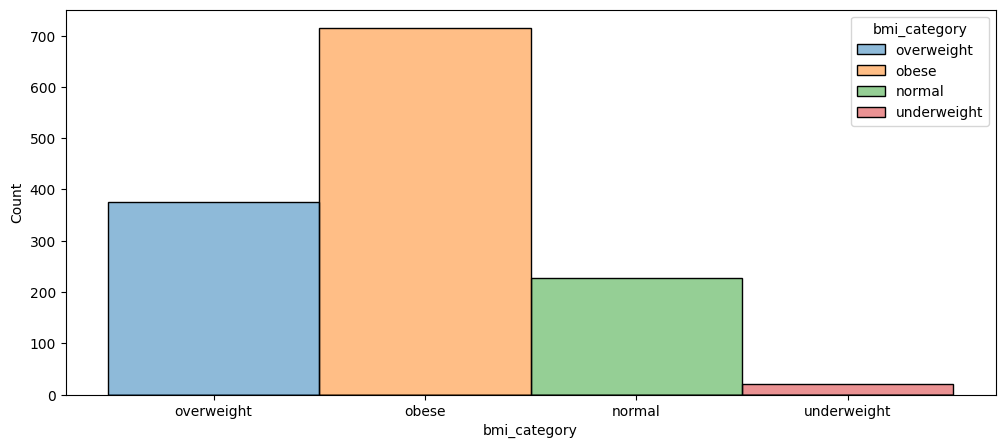

In [39]:
fig, (ax1) = plt.subplots(nrows=1,ncols=1)
fig.set(figwidth=12, figheight=5)
sns.histplot(x='bmi_category',hue='bmi_category',palette='tab10', data=df, ax=ax1)
plt.show()